In [2]:
import pickle as pkl
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
plt.rcParams['font.size']=45
plt.rcParams['axes.linewidth']= 3.

plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['figure.figsize']=(16,12)


In [179]:
df_SDSS = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/photometric_catalog_for_Sersic_blobs_SerOnly.dat')
df_SDSS.columns

Index(['galcount', 'm_bulge', 'r_bulge', 'ba_bulge', 'n_bulge', 'GalSky',
       'GalSky_err', 'chi2nu', 'finalflag', 'objid', 'z'],
      dtype='object')

In [80]:
with open('/scratch/lzanisi/pixel-cnn/SDSS_cutouts/0.02_0.08_Mstar_gt10_asinh_test_blobsLike_raw.pkl','rb') as f:
    obj = pkl.load(f)
SDSS = np.asarray(obj['data'][:,64:192,64:192])#.flatten()
i =np.array(obj['objid'])

In [56]:
df_SDSS = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/cleaned_df_bis_0.02_0.08_blobsLike_raw.dat', sep=' ')
df_SDSS = df_SDSS[67000:]
df_SDSS.index= np.arange(0,df_SDSS.shape[0])


In [88]:
SDSS_new.shape

(25316, 128, 128)

In [58]:
df_SDSS=df_SDSS.query('z>0.04 & z<0.05')
ids = df_SDSS.index
SDSS = SDSS[ids,:,:]

In [160]:
with open('/scratch/lzanisi/pixel-cnn/SDSS_cutouts//0.02_0.08_Mstar_gt10_asinh_test_blobsLike_nmaggie_noskysub.pkl','rb') as f:
    obj = pkl.load(f)
    
SDSS_new = np.asarray(obj['data'][:,64:192,64:192])#.flatten()
objid =np.array(obj['objid'])

In [ ]:
df_SDSS = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/cleaned_df_bis_0.02_0.08_blobsLike_nmaggie.dat', sep='')

In [161]:
flat = SDSS_new.flatten()
flat = flat[flat<10]


In [162]:
with open('/scratch/lzanisi/pixel-cnn/sersic_blobs/sersic_newblobs_SerOnly_FullReal_Uncalibrated_test_nmaggie_noskysub.pkl','rb') as f:
    obj = pkl.load(f)
blobs = np.asarray(obj['data'])#.flatten()
ids_blobs = np.array(obj['objid'])

In [151]:

with open('/scratch/lzanisi/pixel-cnn/sersic_blobs/sersic_newblobs_SerOnly_FullReal_Uncalibrated_test_nmaggie_galsim_skysub.pkl','rb') as f:
    obj = pkl.load(f)
blobs_noreal = np.asarray(obj['data'])#.flatten()
ids_blobs_noreal = np.array(obj['objid'])


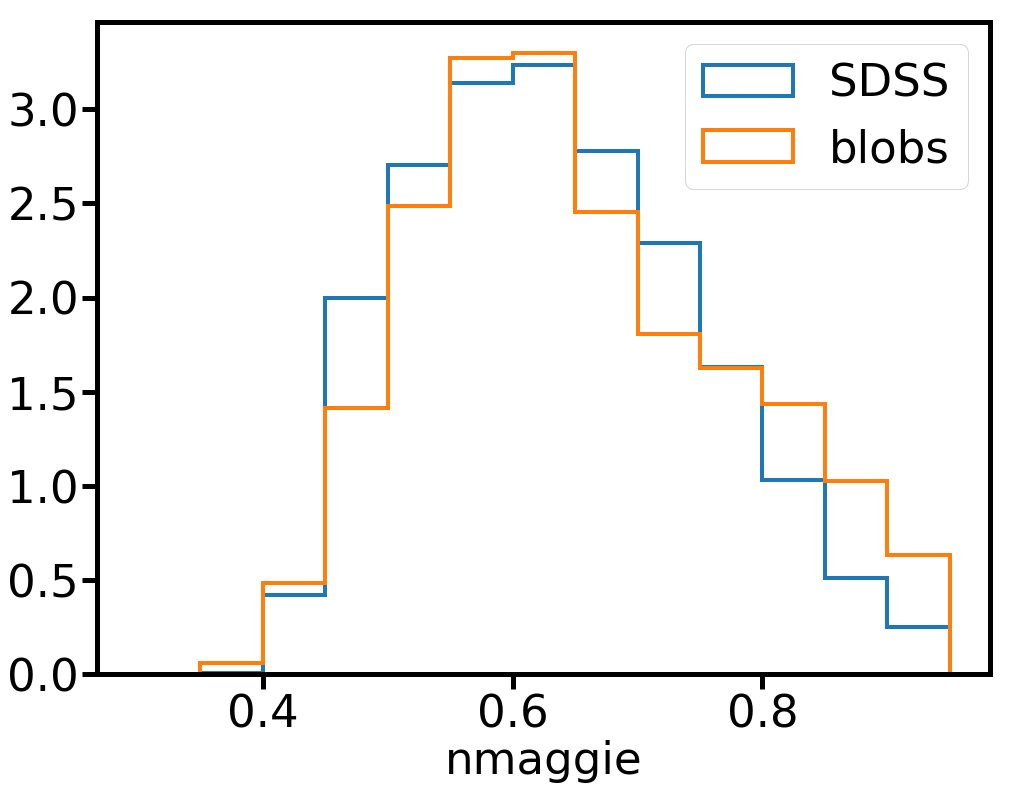

In [166]:
plt.hist(flat, bins=np.arange(0.3,1,0.05), histtype='step', normed=True, label='SDSS', lw=4)
FLAT  = blobs.flatten()
plt.hist( FLAT[FLAT<10], bins=np.arange(0.3,1,0.05), histtype='step', normed=True, label='blobs', lw=4)
#plt.hist(blobs_noreal.flatten(), bins=np.arange(0,0.1,0.001), histtype='step', normed=True, label='blobs no real', lw=4, ls=':')
plt.xlabel('nmaggie')
plt.legend()

In [95]:
objid-ids_blobs

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
with open('/scratch/lzanisi/pixel-cnn/TNG_cutouts/0.045_skysub_orig_Mgt9.5.pkl','rb') as f:
    obj = pkl.load(f)
TNG_orig = np.asarray(obj['objid'])#.flatten()
with open('/scratch/lzanisi/pixel-cnn/TNG_cutouts/0.045_skysub_magmatch_Mgt9.5.pkl','rb') as f:
    obj = pkl.load(f)
TNG_magmatch = np.asarray(obj['objid'])#.flatten(
len(TNG_magmatch), len(TNG_orig)

(12470, 12470)

In [21]:
with open('/scratch/lzanisi/pixel-cnn/TNG50_cutouts/0.045_raw.pkl','rb') as f:
    obj = pkl.load(f)
TNG50 = np.asarray(obj['data']).flatten()

In [27]:
with open('/scratch/lzanisi/pixel-cnn/Illustris1/0.045_raw_newflux.pkl','rb') as f:
    obj = pkl.load(f)
Illustris = np.asarray(obj['data']).flatten()

In [11]:
bins=np.arange(-5,0,0.1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

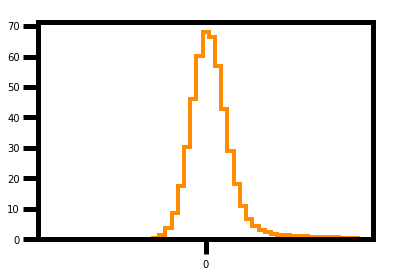

In [8]:
plt.xscale('symlog', linthresh=0.01)
bins=np.linspace(-0.05,0.05,50)
plt.hist(SDSS[(SDSS<0.15) ], bins=bins, histtype='step', normed=True,label='SDSS (Meert et al.)', lw=4,ls='-',color='darkorange')
#plt.hist(SDSS_new[(SDSS_new<0.15) ], bins=bins, histtype='step', normed=True,label='SDSS', lw=4,ls='-',color='yellow')

#plt.hist(blobs[(blobs<0.15) ], bins=bins, histtype='step', normed=True,label='blobs', lw=4,ls='-',color='limegreen')


plt.hist(TNG[(TNG<0.15) ],  histtype='step',bins=bins ,normed=True,label='TNG',lw=4, ls='--', color='teal')
plt.hist(TNG50[(TNG50<0.15) ],  histtype='step',bins=bins ,normed=True,label='TNG50',lw=4, ls='--', color='magenta')

plt.hist(Illustris[(Illustris<0.15) ],  histtype='step',bins=bins ,normed=True,label='Illustris', lw=4,ls=':', color='firebrick')

plt.xlabel('pixel value')
plt.xlim(-0.05,0.05)
plt.legend(frameon=False, fontsize=30)
plt.ylabel('#')

Text(0, 0.5, '#')

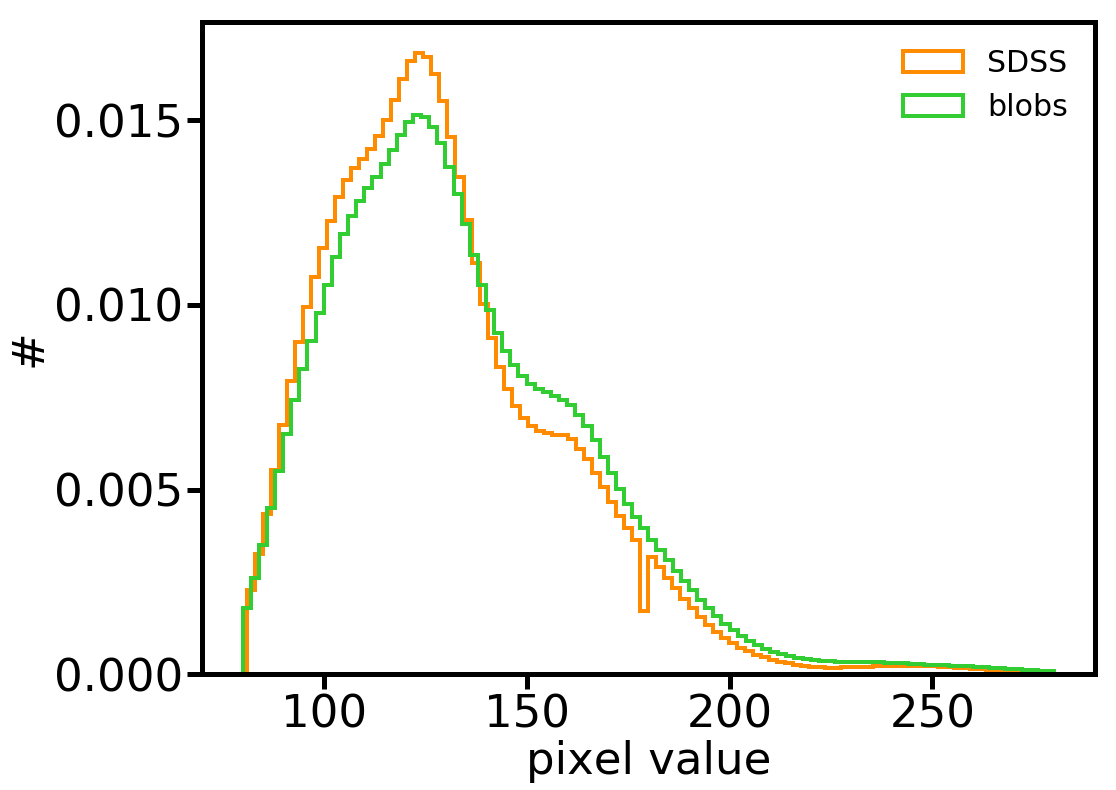

In [65]:
plt.hist(SDSS[(SDSS<280) & (SDSS>80)], bins=100, histtype='step', normed=True,label='SDSS', lw=4,ls='-',color='darkorange')
plt.hist(blobs[(blobs<280) & (blobs>80)], bins=100, histtype='step', normed=True,label='blobs', lw=4,ls='-',color='limegreen')

#plt.hist(TNG[(TNG<280) & (TNG>80)],  histtype='step',bins=100 ,normed=True,label='TNG',lw=4, ls='--', color='teal')
#plt.hist(TNG50[(TNG50<280) & (TNG50>80)],  histtype='step',bins=100 ,normed=True,label='TNG50',lw=4, ls='--', color='magenta')

#plt.hist(Illustris[(Illustris<280) & (Illustris>80)],  histtype='step',bins=100 ,normed=True,label='Illustris', lw=4,ls=':', color='firebrick')

plt.xlabel('pixel value')
plt.legend(frameon=False, fontsize=30)
plt.ylabel('#')
#plt.savefig('/scratch/lzanisi/pixel-cnn/analysis/results/pixelValues_linear.png')

In [66]:
df_meert = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/df_cleaned_goodBlobs_SerOnly.dat', sep=' ') # use this one for double test with blobs
df_sky = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/DR7_FieldInfo.csv') 
df = df_meert.merge(df_sky, on='objid') # keep the same ordering as original data
    

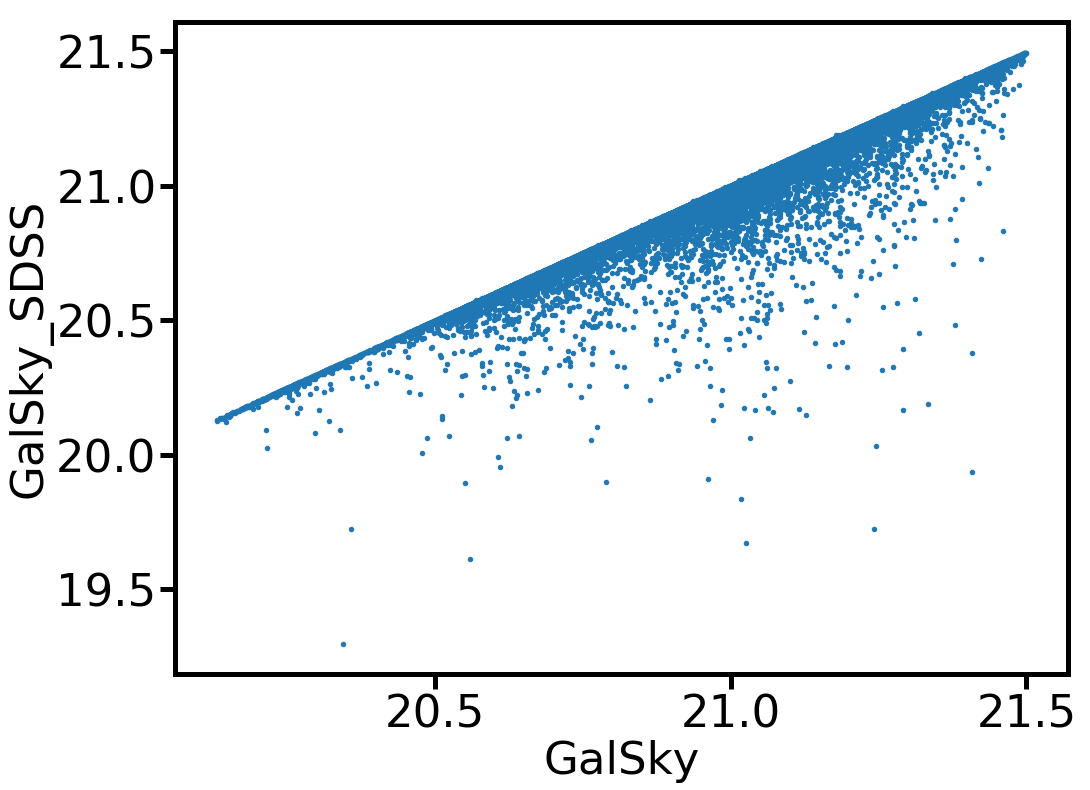

In [69]:
df.plot.scatter('GalSky','GalSky_SDSS')